In [7]:
import ants
import numpy as np

In [8]:
# Load the SynthSeg segmentation (NIfTI)
seg_path = "/Volumes/Siren/Brain_Analyses/BrainStemRadiomics/T1_last_tp/160/T1_int_synthseg.nii.gz"
seg = ants.image_read(seg_path)

# Convert to numpy array for manipulation
seg_np = seg.numpy()

In [9]:
# Define labels to combine
brainstem_labels = [16, 17, 18]  # Brain-Stem + left/right peduncles

# Create a binary mask where voxels equal to any of these labels are set to 1
brainstem_mask_np = np.isin(seg_np, brainstem_labels).astype(np.uint8)

# Convert back to ANTs image
brainstem_mask = ants.from_numpy(brainstem_mask_np, origin=seg.origin, spacing=seg.spacing, direction=seg.direction)

# Save the mask
ants.image_write(brainstem_mask, "/Volumes/Siren/Brain_Analyses/BrainStemRadiomics/T1_last_tp/160/subject_brainstem_mask.nii.gz")

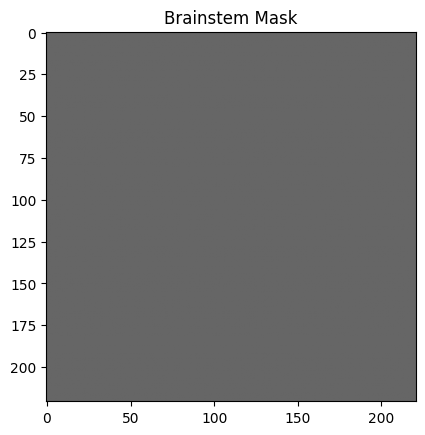

In [10]:
import matplotlib.pyplot as plt

# Plot middle slice
slice_index = seg.shape[2] // 2
plt.imshow(brainstem_mask_np[:, :, slice_index], cmap="Accent_r")
plt.title("Brainstem Mask")
plt.show()
